In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statG import Gauss
import scipy.stats
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:

gauss = Gauss()
gauss.create_sample(20,50,0.5)


(array([1., 0., 0., 1., 2., 2., 1., 4., 4., 5.]),
 array([49.22820854, 49.34847479, 49.46874105, 49.58900731, 49.70927356,
        49.82953982, 49.94980608, 50.07007234, 50.19033859, 50.31060485,
        50.43087111]),
 <a list of 10 Patch objects>)

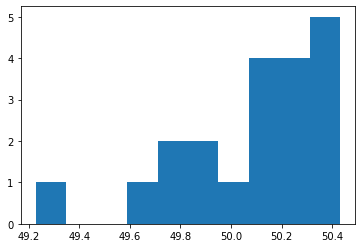

In [3]:

plt.hist(gauss.get_sample(),bins=10 )

In [4]:

gauss.sign_test(0)

1.9073486328125e-06

In [5]:

gauss.wilcoxon_test(50)

0.0017130176382194051

In [6]:

res_sign = []
res_sign2 = []
res_wilcoxon = []
res_wilcoxon2 = []
mus = np.arange(0,2,0.1)
sigmas = np.arange(0.5,2,0.1)
for mu in np.arange(0,2,0.1):
    res_sign2.append([])
    res_wilcoxon2.append([])
    for sigma in np.arange(0.5,2,0.1):
        positive_sign = 0
        positive_wilcoxon = 0
        cicles = 10000
        for i in range(cicles):
            gauss.create_sample(20,mu,sigma ** 2)
            positive_sign += gauss.sign_test(0)
            positive_wilcoxon += gauss.wilcoxon_test(0)
        res_sign.append([mu,sigma,positive_sign/cicles])
        res_sign2[-1].append(positive_sign/cicles)
        res_wilcoxon2[-1].append(positive_wilcoxon/cicles)


In [7]:

res_sign = res_sign2
res_wilcoxon = res_wilcoxon2
res_sign2 = np.matrix(res_sign2)
res_wilcoxon2 = np.matrix(res_wilcoxon2)

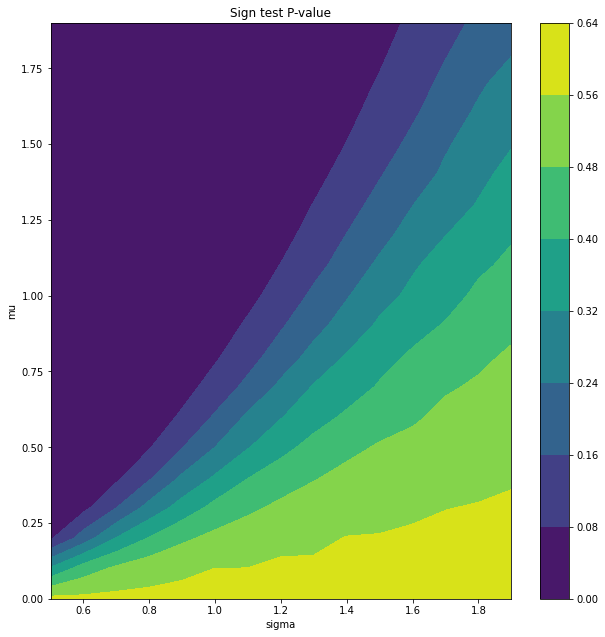

In [8]:

fig = plt.figure(figsize=(10,10))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
cp = plt.contourf(sigmas,mus,res_sign2)
plt.colorbar(cp)
ax.set_xlabel('sigma')
ax.set_ylabel('mu')
ax.set_title('Sign test P-value')
plt.show()

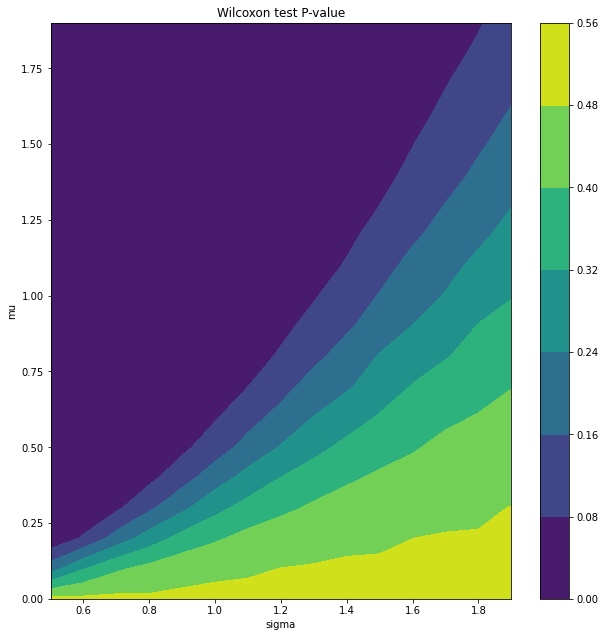

In [9]:
fig = plt.figure(figsize=(10,10))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
cp = plt.contourf(sigmas,mus,res_wilcoxon2)
plt.colorbar(cp)
ax.set_xlabel('sigma')
ax.set_ylabel('mu')
ax.set_title('Wilcoxon test P-value')
plt.show()

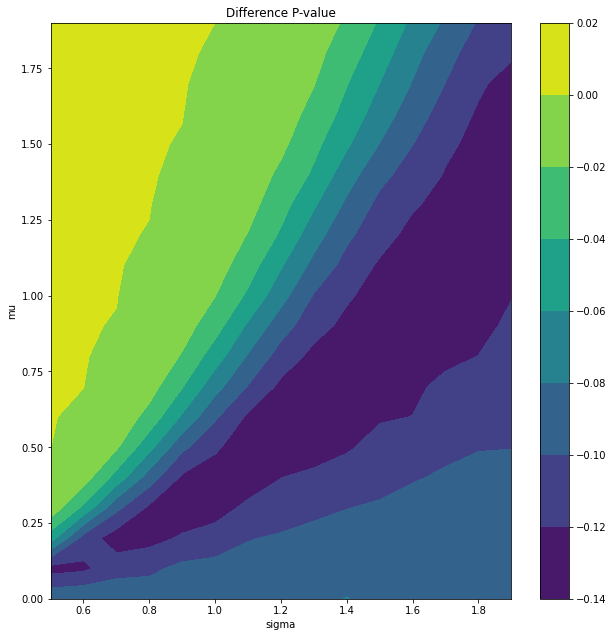

In [10]:

fig = plt.figure(figsize=(10,10))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
cp = plt.contourf(sigmas,mus,res_wilcoxon2-res_sign2)
plt.colorbar(cp)
ax.set_xlabel('sigma')
ax.set_ylabel('mu')
ax.set_title('Difference P-value')
plt.show()